In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normalize_image(images):
    mean = np.mean(images)
    std = np.std(images)
    image_normalized = (images - mean) / std
    return image_normalized 


In [34]:
np.random.randint(0,n,grid_size)

array([88, 34, 54, 91, 34, 35, 55, 53, 22, 57])

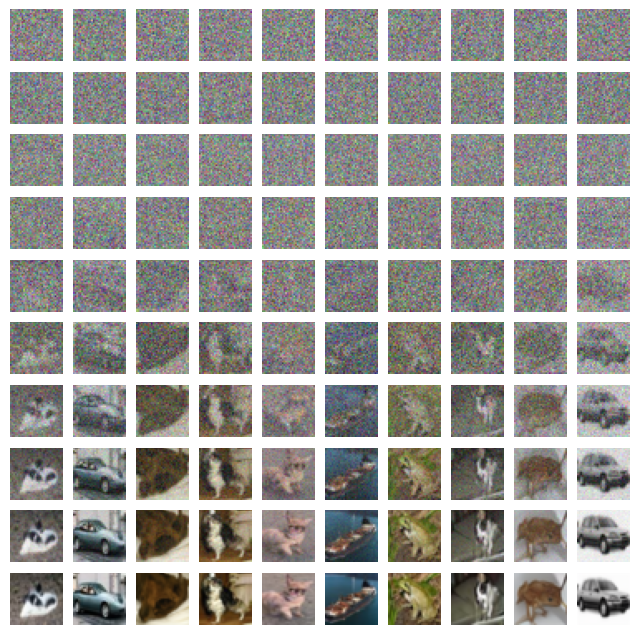

In [35]:
n=49
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_1000.npz'

# Create a new figure
plt.figure(figsize=(8,8))
# Number of rows/columns in the grid
grid_size = 10
counter = 1
indices = np.random.randint(0,n,grid_size)

for i in range(0, 10):
    file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/intermediate_images/{i+1}/ray19.npz'
    data = np.load(file_path)
    gen_samples = data['images']
    gen_samples =  normalize_image(gen_samples)
    gen_samples = np.interp(gen_samples, 
                            (gen_samples.min(), gen_samples.max()), 
                            (0, 1))
    images = gen_samples[indices]

    if images.shape[1]==3:
        images = images.transpose(0,2,3,1)

    # Loop over the images
    for j in range(grid_size):
        # Create a subplot for each image
        plt.subplot(grid_size, grid_size, counter)
        # Display the image
        plt.imshow(images[j])
        # Remove the axes
        plt.axis('off')
        counter += 1

    # Show the figure
plt.show()

100 images


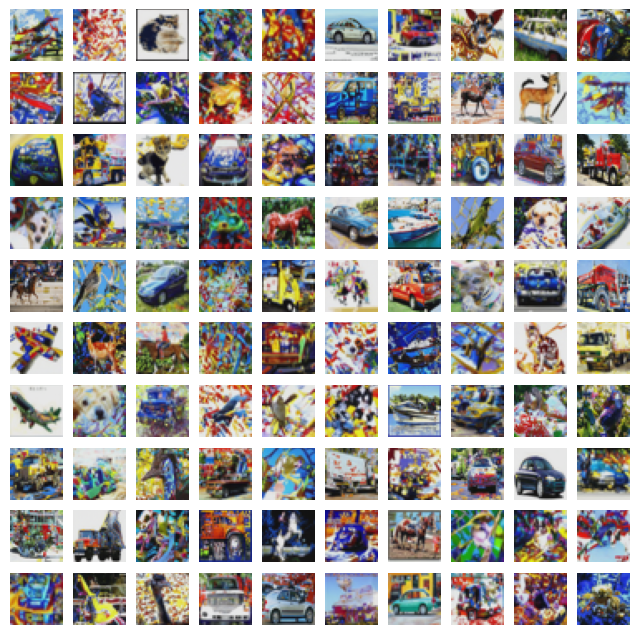

In [3]:
n=100
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_1000.npz'
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/intermediate_images/{10}/gpu18.npz'

data = np.load(file_path)
gen_samples = data['images']
gen_samples = np.interp(gen_samples, 
                        (gen_samples.min(), gen_samples.max()), 
                        (0, 1))

images = gen_samples

print(f'{images.shape[0]} images')

# Number of rows/columns in the grid
grid_size = int(np.sqrt(n))

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

np.random.shuffle(images)

# Loop over the images
for j in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, j+1)
    # Display the image
    plt.imshow(images[j])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

1000 images


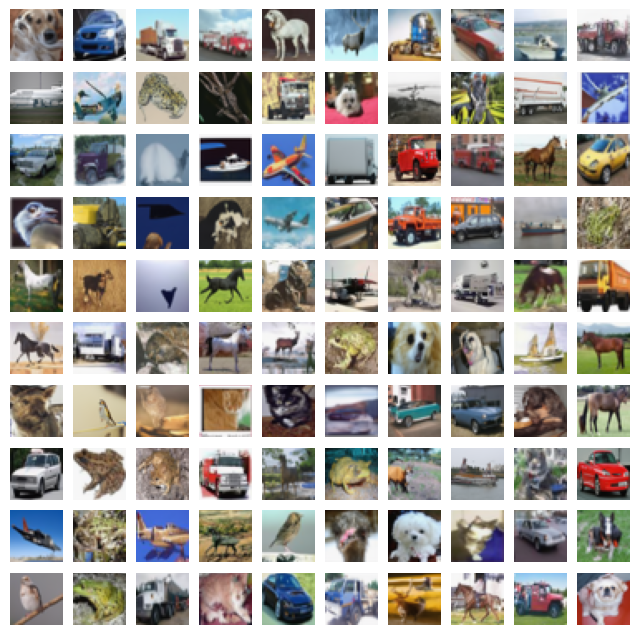

In [24]:
n=100
file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_1000.npz'

data = np.load(file_path)
gen_samples = data['images']
gen_samples = np.interp(gen_samples, 
                        (gen_samples.min(), gen_samples.max()), 
                        (0, 1))

images = gen_samples

print(f'{images.shape[0]} images')

# Number of rows/columns in the grid
grid_size = int(np.sqrt(n))

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

np.random.shuffle(images)

# Loop over the images
for j in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, j+1)
    # Display the image
    plt.imshow(images[j])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

In [152]:
# Get a list of all files in the directory
dir_path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/fids/'
files = os.listdir(dir_path)
fid_iteration = np.zeros(10)
for file in files:
    i = int(file.split('.')[0])
    data = np.load(os.path.join(dir_path, file))
    fid = data['fid']
    fid_iteration[i-1] = fid

In [153]:
save_combines_path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.7_linear_decrease.npz'
np.savez(save_combines_path, all_fids=fid_iteration)

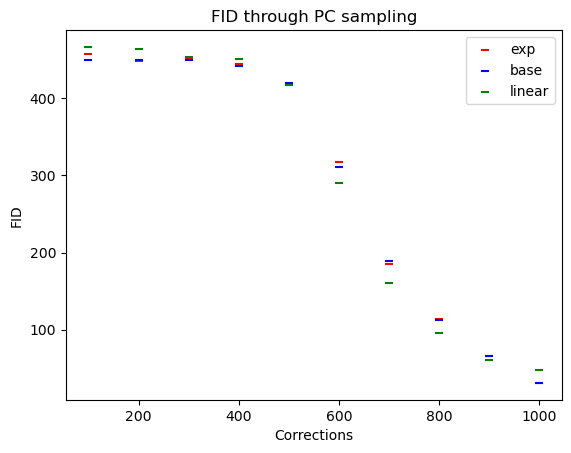

In [156]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/exp_0.7_300.npz')
fid_iteration_0 = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/base.npz')
fid_iteration = data['all_fids']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/combined_fids/0.7_linear_decrease.npz')
fid_iteration1 = data['all_fids']
plt.scatter(np.arange(100, 1001, 100), fid_iteration_0, marker='_', c='r',
            label='exp')
plt.scatter(np.arange(100, 1001, 100), fid_iteration, marker='_', c='b',
            label='base')
plt.scatter(np.arange(100, 1001, 100), fid_iteration1, marker='_', c='g',
            label='linear')
plt.title('FID through PC sampling')
plt.ylabel('FID')
# plt.yscale('log')
plt.xlabel('Corrections')
plt.legend()
plt.show()